<a href="https://colab.research.google.com/github/tekchandk/Covid-19/blob/plots/corona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd 
from google.colab import files
uploaded = files.upload()

Saving covid_19_04.csv to covid_19_04 (3).csv


In [0]:
df = pd.read_csv ("covid_19_04.csv", delimiter=',')
df.drop(['day', 'month', 'year', 'geoId', 'continentExp'], axis = 1) 
df.set_index('countriesAndTerritories', inplace=True)


119
119


,dateRep,day,month,year,cases,deaths,geoId,countryterritoryCode,popData2018,continentExp,Cumultive_Cases,Cumultive_Deaths
countriesAndTerritories,,,,,,,,,,,,
Iran,27/04/2020,27,4,2020,1153,60,IR,IRN,81800269.0,Asia,90481,5710
Iran,26/04/2020,26,4,2020,1134,76,IR,IRN,81800269.0,Asia,89328,5650
Iran,25/04/2020,25,4,2020,1168,93,IR,IRN,81800269.0,Asia,88194,5574
Iran,24/04/2020,24,4,2020,1030,90,IR,IRN,81800269.0,Asia,87026,5481
Iran,23/04/2020,23,4,2020,1194,94,IR,IRN,81800269.0,Asia,85996,5391
...,...,...,...,...,...,...,...,...,...,...,...,...
Iran,04/01/2020,4,1,2020,0,0,IR,IRN,81800269.0,Asia,0,0
Iran,03/01/2020,3,1,2020,0,0,IR,IRN,81800269.0,Asia,0,0
Iran,02/01/2020,2,1,2020,0,0,IR,IRN,81800269.0,Asia,0,0


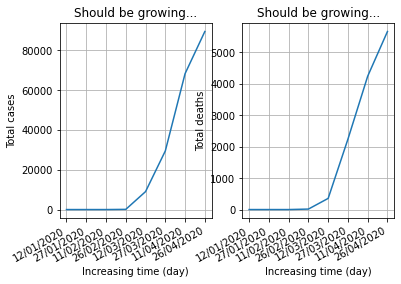

In [0]:

df
country_name ="Iran"
time_interval = 15
country_wise_data = df.loc[[country_name]]
cumulative_case_country_wise =[]
total_cases = country_wise_data['cases'].sum()

cumulative_death_country_wise =[]
total_deaths = country_wise_data['deaths'].sum()

for x in range(0, len(country_wise_data['cases'] - 1)):
  cumulative_case_country_wise.append(total_cases)
  total_cases = total_cases - country_wise_data.cases[x]
print(len(cumulative_case_country_wise))
country_wise_data['Cumultive_Cases'] = cumulative_case_country_wise



for x in range(0, len(country_wise_data['deaths'] - 1)):
  cumulative_death_country_wise.append(total_deaths)
  total_deaths = total_deaths - country_wise_data.deaths[x]
print(len(cumulative_death_country_wise))
country_wise_data['Cumultive_Deaths'] = cumulative_death_country_wise

plt.close('all')
fig, (case, death) = plt.subplots(1, 2)
case.plot(country_wise_data.dateRep[1:len(country_wise_data['dateRep']):time_interval], country_wise_data.Cumultive_Cases[1:len(country_wise_data['dateRep']):time_interval])
case.set_xlabel('Increasing time (day)')
case.set_ylabel('Total cases')
case.set_title('Should be growing...')
case.grid(True)
case.invert_xaxis()

death.plot(country_wise_data.dateRep[1:len(country_wise_data['dateRep']):time_interval], country_wise_data.Cumultive_Deaths[1:len(country_wise_data['dateRep']):time_interval])
death.set_xlabel('Increasing time (day)')
death.set_ylabel('Total deaths')
death.set_title('Should be growing...')
death.grid(True)
death.invert_xaxis()

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
import matplotlib.dates as mdates
case.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
country_wise_data

In [0]:
# use ANN model to predict the total cases and deaths in a specific country
